Imports all required libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from scipy import stats
import statsmodels.formula.api as sm

- Data Preparation
Read dataSet file and prepare DataFrames.CriticScore

In [5]:
dataSet = pd.read_csv("data/PowerRangersDataSetBase.csv")

dataSet.drop(columns=['Title'], inplace=True)
dataSet.drop(columns=['IsMistery'], inplace=True)
dataSet['DirectorFactor'] = pd.factorize(dataSet['Director'])[0]
dataSet['LeadActorFactor'] = pd.factorize(dataSet['LeadActor'])[0]
dataSet.dropna(inplace=True)

features = ['Votes', 'CriticScore', 'IsAction', 'IsAdventure', 'IsAnimation', 'IsBiography', 'IsComedy', 'IsCrime', 'IsDrama', 'IsRomance',
            'IsFantasy', 'IsHorror', 'IsHistory', 'IsFamily', 'IsSport', 'IsWar', 'IsWestern', 'IsSciFi', 'IsThriller', 'DirectorFactor', 'LeadActorFactor']

featuresVector = dataSet[features]

labels = ['Rating']

labelsVector = dataSet[labels]

featuresVector

,Votes,CriticScore,IsAction,IsAdventure,IsAnimation,IsBiography,IsComedy,IsCrime,IsDrama,IsRomance,...,IsHorror,IsHistory,IsFamily,IsSport,IsWar,IsWestern,IsSciFi,IsThriller,DirectorFactor,LeadActorFactor
0,757074,76.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,485820,65.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,157606,62.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,2,2
3,60545,59.0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,3,3
4,393727,40.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4
5,56036,42.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,5
6,258682,93.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,6,6
7,2490,71.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,7,7
8,7188,78.0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
9,192177,41.0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,9,9


Plot CriticScore vs Rating

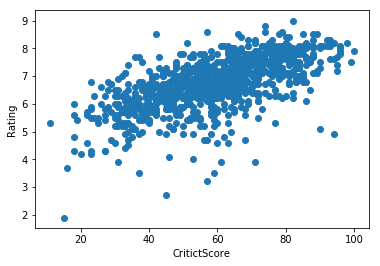

In [6]:
plt.scatter(dataSet.CriticScore, dataSet.Rating)
plt.ylabel('Rating')
plt.xlabel('CritictScore')
plt.show()

Plot IsAction vs Rating

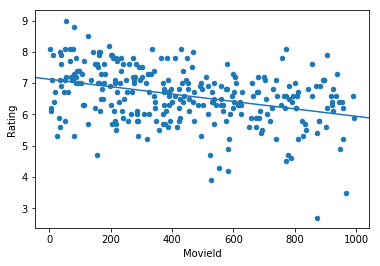

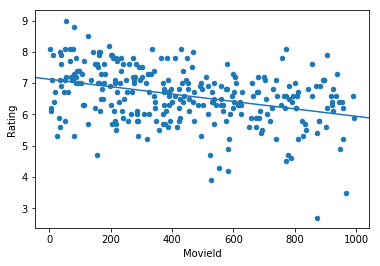

In [53]:
dataSetAction = dataSet[dataSet['IsAction'] == 1]

textFormula="Rating ~ MovieId"
#textFormula = "Rating ~ IsAction + IsAdventure + IsAnimation + IsBiography + IsComedy + IsCrime + \
#                         IsDrama + IsRomance + IsFantasy + IsHorror + IsHistory + IsFamily + IsSport + \
#                         IsWar + IsWestern + IsSciFi + IsThriller";

result = sm.ols(textFormula, data=dataSetAction).fit()
#result = sm.ols(formula="Rating ~ IsAction + IsAdventure + IsAnimation + IsBiography + IsComedy + IsCrime + \
#                         IsDrama + IsRomance + IsFantasy + IsHorror + IsHistory + IsFamily + IsSport + \
#                         IsWar + IsWestern + IsSciFi + IsThriller", data=dataSet).fit()

ax = dataSetAction.plot(x='MovieId', y='Rating', kind='scatter')
from statsmodels.graphics.regressionplots import abline_plot
abline_plot(model_results=result, ax=ax)

Define test and validation sets

In [29]:
 from sklearn.model_selection import train_test_split
    
train_x, test_x, train_y, test_y = train_test_split(featuresVector, labelsVector, test_size=0.3)


print ("training set count ", len(train_x))
print ("testing set count ", len(test_x))

training set count  655
testing set count  281


Perform the linear regression and retrieve coeficients and intercepts

In [54]:
lr = LinearRegression()

lrModel = lr.fit(train_x, train_y)

print("Coefficients: " + str(lrModel.coef_))
print("Intercept: " + str(lrModel.intercept_))

Coefficients: [[ 1.91082067e-06  2.39875450e-02 -4.15054490e-02 -8.21964007e-02
   3.98190761e-01  1.96136415e-01 -2.25201790e-02  6.89476549e-02
   2.28208061e-01  4.20392959e-02 -1.20256329e-01 -2.73201082e-01
  -9.19222087e-02  4.03017388e-02  2.34564500e-01  4.75540151e-01
   6.61129813e-02 -1.29637180e-01 -1.00837650e-01 -3.71973538e-04
  -2.17651358e-04]]
Intercept: [5.04197454]


Predict Rating based on new movie genre input

In [56]:
lrModel.predict(test_x)

array([[ 5.84205692],
       [ 6.07891185],
       [ 6.13844445],
       [ 6.9461516 ],
       [ 6.44944556],
       [ 7.60621993],
       [ 6.29761008],
       [ 5.71142322],
       [ 6.31674739],
       [ 7.06566091],
       [ 6.38716853],
       [ 7.64375634],
       [ 6.29085269],
       [ 8.19163434],
       [ 7.01638299],
       [ 6.5410339 ],
       [ 6.9711864 ],
       [ 7.85682208],
       [ 7.51174502],
       [ 5.59588356],
       [ 6.30779434],
       [ 6.60145722],
       [ 5.92270678],
       [ 6.15766757],
       [ 7.31598062],
       [ 6.72019397],
       [ 5.50194786],
       [ 6.162685  ],
       [ 6.36617197],
       [ 7.35921952],
       [ 7.44110826],
       [ 8.82143996],
       [ 6.61987097],
       [ 7.54074058],
       [ 6.57129537],
       [ 5.75599872],
       [ 6.05405514],
       [ 7.39720202],
       [ 6.26862291],
       [ 6.82015787],
       [ 8.06064997],
       [ 6.85286697],
       [ 6.39489897],
       [ 7.52475798],
       [ 7.50633962],
       [ 5

Get model accuracy comparing test sets

In [52]:
lrModel.score(test_x, test_y)

0.5790505818412112